In [1]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.mobilenet import MobileNet as MN
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
train_path = r'C:\Users\Nilay\Desktop\SynergyLabs Task\flowers Data\Train'  # Change this path as per system
valid_path = r'C:\Users\Nilay\Desktop\SynergyLabs Task\flowers Data\Test'

In [3]:
# Re-size all the images to this
IMAGE_SIZE = [224, 224]

# Add preprocessing layer to the front of MN
mn = MN(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Don't train existing weights
for layer in mn.layers:
    layer.trainable = False

In [4]:
# Getting number of classes
folders = glob(r'C:\Users\Nilay\Desktop\SynergyLabs Task\flowers Data\Train/*')  # Change this path as per system

In [5]:
# Preparing Data
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# our layers - you can add more if you want
x = Flatten()(mn.output)
x = Dropout(0.3)(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mn.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Found 990 images belonging to 3 classes.
Found 292 images belonging to 3 classes.
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
______________________________________

In [6]:
er = EarlyStopping(monitor='val_accuracy',)

In [7]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
    callbacks = er
    )

Epoch 1/5
31/31 [==============================] - 48s 2s/step - loss: 1.6403 - accuracy: 0.8202 - val_loss: 0.4356 - val_accuracy: 0.9418
Epoch 2/5
31/31 [==============================] - 47s 2s/step - loss: 0.3080 - accuracy: 0.9687 - val_loss: 0.3373 - val_accuracy: 0.9692
Epoch 3/5
31/31 [==============================] - 48s 2s/step - loss: 0.2533 - accuracy: 0.9768 - val_loss: 0.3448 - val_accuracy: 0.9658


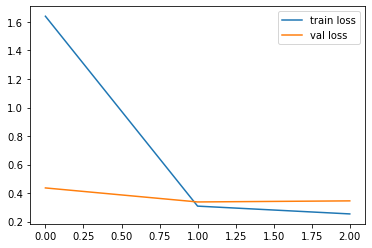

In [8]:
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

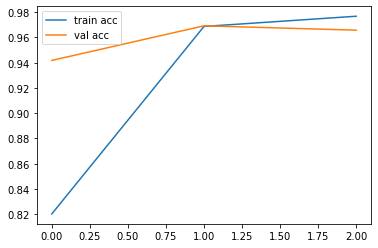

In [9]:
# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()